INFO: 6-En-1: Distance from point to plane: 0.361 Å
INFO: Plot saved as points_and_distance_6-En-1.png
INFO: 6-En-2: Distance from point to plane: 0.335 Å
INFO: Plot saved as points_and_distance_6-En-2.png
INFO: 6-En-3: Distance from point to plane: 0.438 Å
INFO: Plot saved as points_and_distance_6-En-3.png
INFO: 6-En-4: Distance from point to plane: 0.348 Å
INFO: Plot saved as points_and_distance_6-En-4.png
INFO: 6-EnPh-1: Distance from point to plane: 0.335 Å
INFO: Plot saved as points_and_distance_6-EnPh-1.png
INFO: 6-EnPh-2: Distance from point to plane: 0.308 Å
INFO: Plot saved as points_and_distance_6-EnPh-2.png
INFO: 6-EnPh-3: Distance from point to plane: 0.426 Å
INFO: Plot saved as points_and_distance_6-EnPh-3.png
INFO: 6-EnPh-4: Distance from point to plane: 0.329 Å
INFO: Plot saved as points_and_distance_6-EnPh-4.png
INFO: 7-En-1: Distance from point to plane: 0.168 Å
INFO: Plot saved as points_and_distance_7-En-1.png
INFO: 7-En-2: Distance from point to plane: 0.228 Å
INFO:

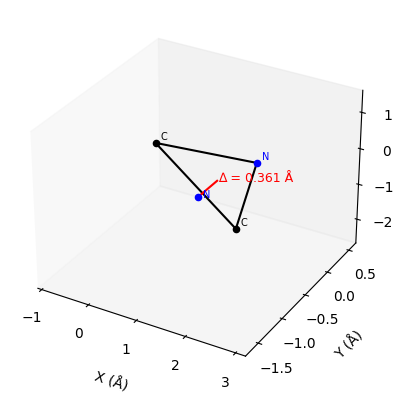

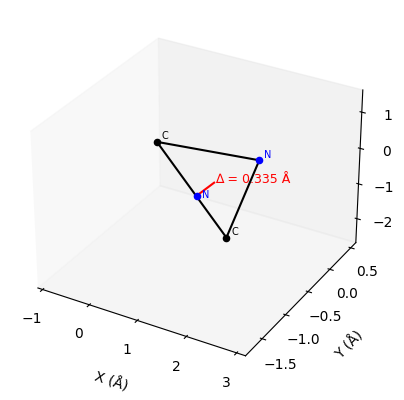

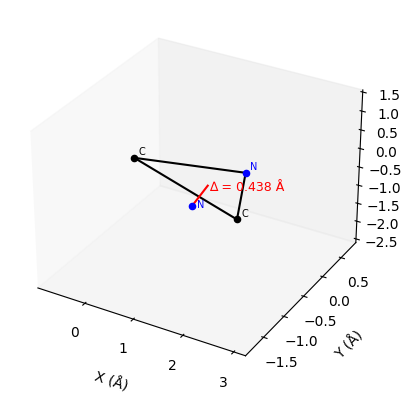

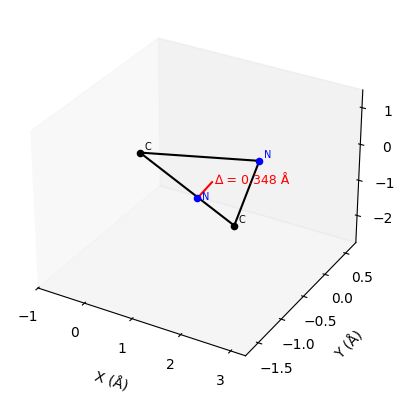

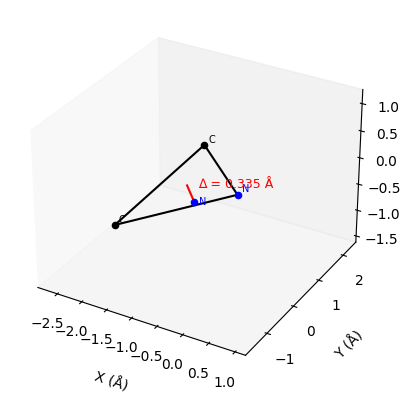

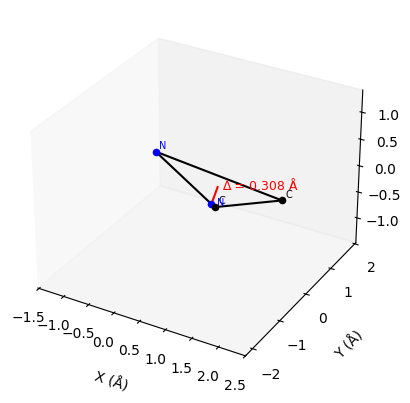

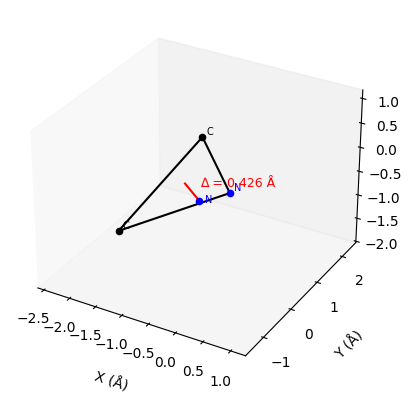

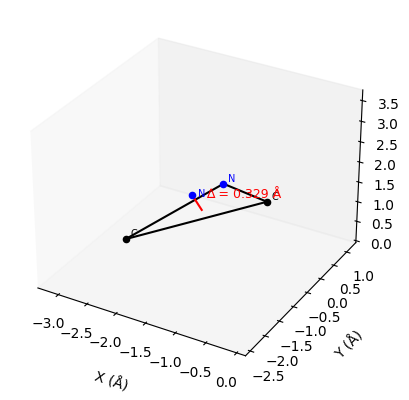

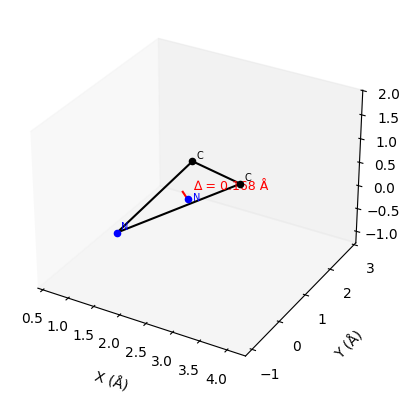

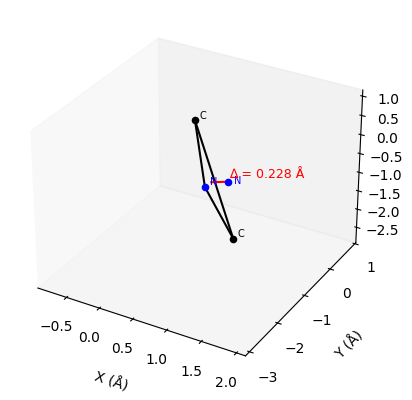

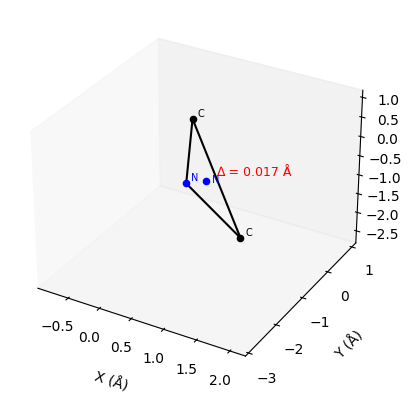

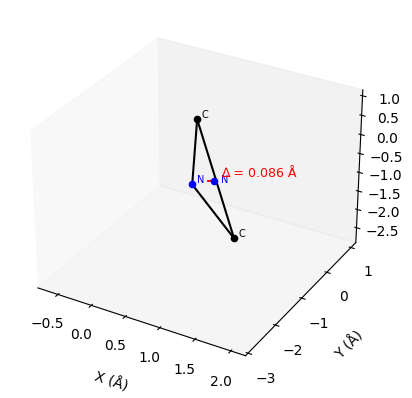

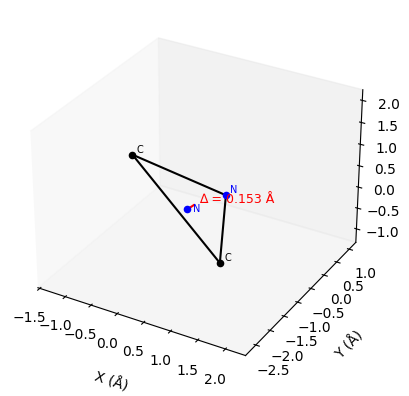

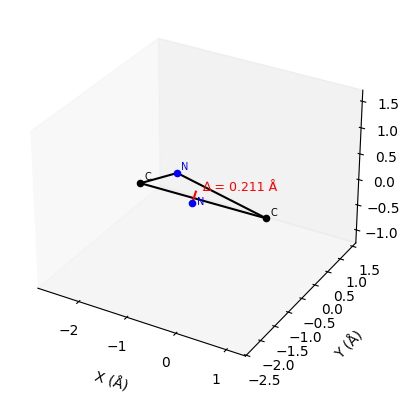

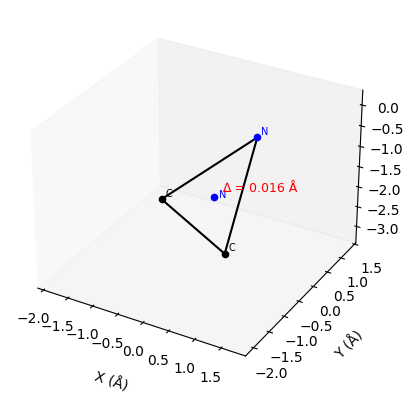

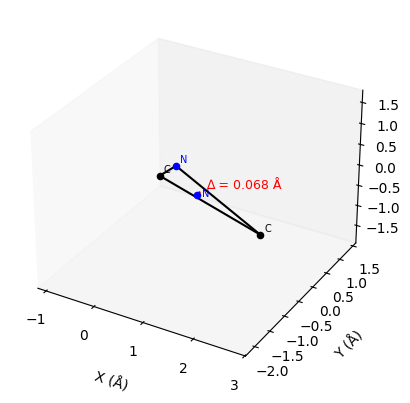

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import logging
import os

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

def read_config(filename):
    """
    Reads the configuration file for color settings.

    Parameters:
    filename : str
        The filename of the configuration file.

    Returns:
    dict
        A dictionary containing the color settings.
    """
    config = {}
    if not os.path.exists(filename):
        logging.error(f"Config file {filename} does not exist.")
        return None

    try:
        with open(filename, 'r') as file:
            lines = file.read().strip().split('\n')
            for line in lines:
                key, value = line.split(':')
                config[key.strip()] = [v.strip() for v in value.split(',')]
        return config
    except Exception as e:
        logging.error(f"An error occurred while reading the config file: {e}")
        return None

def read_multiple_coordinates_from_file(filename):
    """
    Reads multiple sets of coordinates and titles from a text file.

    Parameters:
    filename : str
        The filename of the text file containing the coordinates and titles.

    Returns:
    list of tuples
        A list of tuples, each containing a title and an array of four sets of coordinates.
    """
    if not os.path.exists(filename):
        logging.error(f"File {filename} does not exist.")
        return None

    try:
        with open(filename, 'r') as file:
            lines = file.read().strip().split('\n')
            coordinates = []
            i = 0
            while i < len(lines):
                title = lines[i]
                set_coords = [np.array(list(map(float, lines[i + j + 1].strip().split()))) for j in range(4)]
                coordinates.append((title, set_coords))
                i += 5
        return coordinates
    except Exception as e:
        logging.error(f"An error occurred while reading the file: {e}")
        return None

def plot_points_and_distance(coordinates, output_file_prefix, config):
    """
    Plots points in 3D space, calculates the distance from the fourth point to the plane
    defined by the first three points, and saves the plot to a file for each set of coordinates.

    Parameters:
    coordinates : list of tuples
        A list of tuples, each containing a title and an array of four sets of coordinates.
    output_file_prefix : str
        The prefix for the filenames to save the plots.
    config : dict
        A dictionary containing the color settings.
    """
    distances = []
    try:
        for idx, (title, (p1, p2, p3, p4)) in enumerate(coordinates):
            # Create vectors from points
            v1 = p2 - p1
            v2 = p3 - p1

            # Calculate normal vector to the plane
            normal = np.cross(v1, v2)
            d = -np.dot(normal, p1)

            # Plotting the points
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(p1[0], p1[1], p1[2], color=config['colors'][0])
            ax.scatter(p2[0], p2[1], p2[2], color=config['colors'][1])
            ax.scatter(p3[0], p3[1], p3[2], color=config['colors'][2])
            ax.scatter(p4[0], p4[1], p4[2], color=config['colors'][3])

            # Connect the first three points with specified color
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], color=config['connecting_line_color'][0])
            ax.plot([p2[0], p3[0]], [p2[1], p3[1]], [p2[2], p3[2]], color=config['connecting_line_color'][0])
            ax.plot([p3[0], p1[0]], [p3[1], p1[1]], [p3[2], p1[2]], color=config['connecting_line_color'][0])

            # Calculate distance from point to plane
            distance = abs(np.dot(normal, p4) + d) / np.linalg.norm(normal)
            distances.append((title, distance))
            logging.info(f"{title}: Distance from point to plane: {distance:.3f} Å")

            # Find the projection of the fourth point onto the plane
            projection = p4 - (np.dot(normal, p4) + d) / np.linalg.norm(normal)**2 * normal

            # Connect the fourth point to the plane with a red line
            ax.plot([p4[0], projection[0]], [p4[1], projection[1]], [p4[2], projection[2]], color=config['projection_color'][0])

            # Add labels for the points with coordinates (showing only 3 significant figures)
            ax.text(p1[0] + 0.05, p1[1] + 0.05, p1[2] + 0.05, config['labels'][0], color=config['colors'][0], fontsize=7)
            ax.text(p2[0] + 0.05, p2[1] + 0.05, p2[2] + 0.05, config['labels'][1], color=config['colors'][1], fontsize=7)
            ax.text(p3[0] + 0.05, p3[1] + 0.05, p3[2] + 0.05, config['labels'][2], color=config['colors'][2], fontsize=7)
            ax.text(p4[0] + 0.1, p4[1], p4[2], config['labels'][3], color=config['colors'][3], fontsize=7)

            # Add label for the distance with unit Å (showing only 3 significant figures)
            mid_point = (p4 + projection) / 2
            ax.text(mid_point[0] + 0.1, mid_point[1] + 0.1, mid_point[2] + 0.1, f'∆ = {distance:.3f} Å', color=config['distance_label_color'][0], fontsize=9)

            # Set the limits of the axes dynamically
            all_points = np.array([p1, p2, p3, p4])
            ax.set_xlim([all_points[:, 0].min() - 1, all_points[:, 0].max() + 1])
            ax.set_ylim([all_points[:, 1].min() - 1, all_points[:, 1].max() + 1])
            ax.set_zlim([all_points[:, 2].min() - 1, all_points[:, 2].max() + 1])

            # Add axis labels with unit Å
            ax.set_xlabel('X (Å)', labelpad=10)
            ax.set_ylabel('Y (Å)', labelpad=10)
            ax.set_zlabel('Z (Å)', labelpad=10)

            # Remove the grid and axis
            ax.grid(False)
            #ax.axis('off')

            # Save the plot as a PNG file
            output_file = f"{output_file_prefix}_{title.replace(' ', '_')}.png"
            plt.savefig(output_file)
            logging.info(f"Plot saved as {output_file}")

        # Save distances to a text file
        with open("dunitz_distances.txt", 'w') as f:
            for title, distance in distances:
                f.write(f"{title}: {distance:.3f} Å\n")
        logging.info("Distances saved to dunitz_distances.txt")

    except Exception as e:
        logging.error(f"An error occurred: {e}")

# Execute
config = read_config("config.txt")
if config:
    coordinates = read_multiple_coordinates_from_file("coordinates.txt")
    if coordinates:
        plot_points_and_distance(coordinates, "points_and_distance", config)
